In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lower-back-pain-symptoms-dataset/Dataset_spine.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/kaggle/input/lower-back-pain-symptoms-dataset/Dataset_spine.csv")

In [4]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


## Here is a column which is unnamed,let's see whats this column contains

In [6]:
df["Unnamed: 13"][:30]

0                                                   NaN
1                                                   NaN
2     Prediction is done by using binary classificat...
3                                                   NaN
4                                                   NaN
5            Attribute1  = pelvic_incidence  (numeric) 
6                   Attribute2 = pelvic_tilt (numeric) 
7         Attribute3 = lumbar_lordosis_angle (numeric) 
8                  Attribute4 = sacral_slope (numeric) 
9                 Attribute5 = pelvic_radius (numeric) 
10     Attribute6 = degree_spondylolisthesis (numeric) 
11                    Attribute7= pelvic_slope(numeric)
12                     Attribute8= Direct_tilt(numeric)
13                  Attribute9= thoracic_slope(numeric)
14                  Attribute10= cervical_tilt(numeric)
15                    Attribute11=sacrum_angle(numeric)
16                Attribute12= scoliosis_slope(numeric)
17                                              

## so this column hold the names of the other columns,so let's named those columns & we don't need this column for further purposes,so first drop this column 

In [7]:
df.drop("Unnamed: 13",axis=1,inplace=True)

In [8]:
df.columns=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope",
            "pelvic_radius","degree_spondylolisthesis","pelvic_slope","Direct_tilt",
            "thoracic_slope","cervical_tilt","sacrum_angle","scoliosis_slope","state"]

In [9]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,state
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  state                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [11]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [12]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
state                       0
dtype: int64

## Let's Visualize the Data

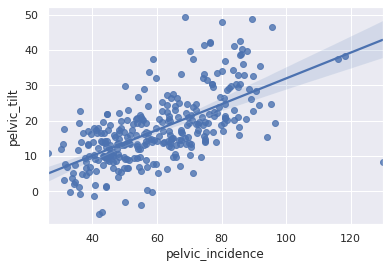

In [13]:
sns.set()
sns.regplot(x="pelvic_incidence", y = "pelvic_tilt",data = df)
plt.show()

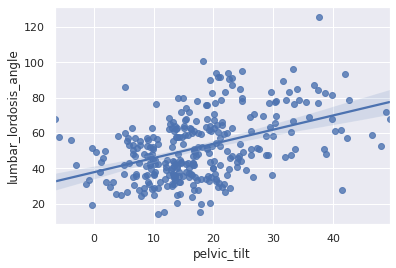

In [14]:
sns.set()
sns.regplot(x = "pelvic_tilt",y="lumbar_lordosis_angle", data = df)
plt.show()

## Let's convert the string value of "state" column into numerical value

In [15]:
df["state"].value_counts()

Abnormal    210
Normal      100
Name: state, dtype: int64

In [16]:
mapping ={"Abnormal": 0,"Normal": 1}
df["state"] = df["state"].map(mapping)

In [17]:
df["state"].value_counts()

0    210
1    100
Name: state, dtype: int64

In [18]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,state
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


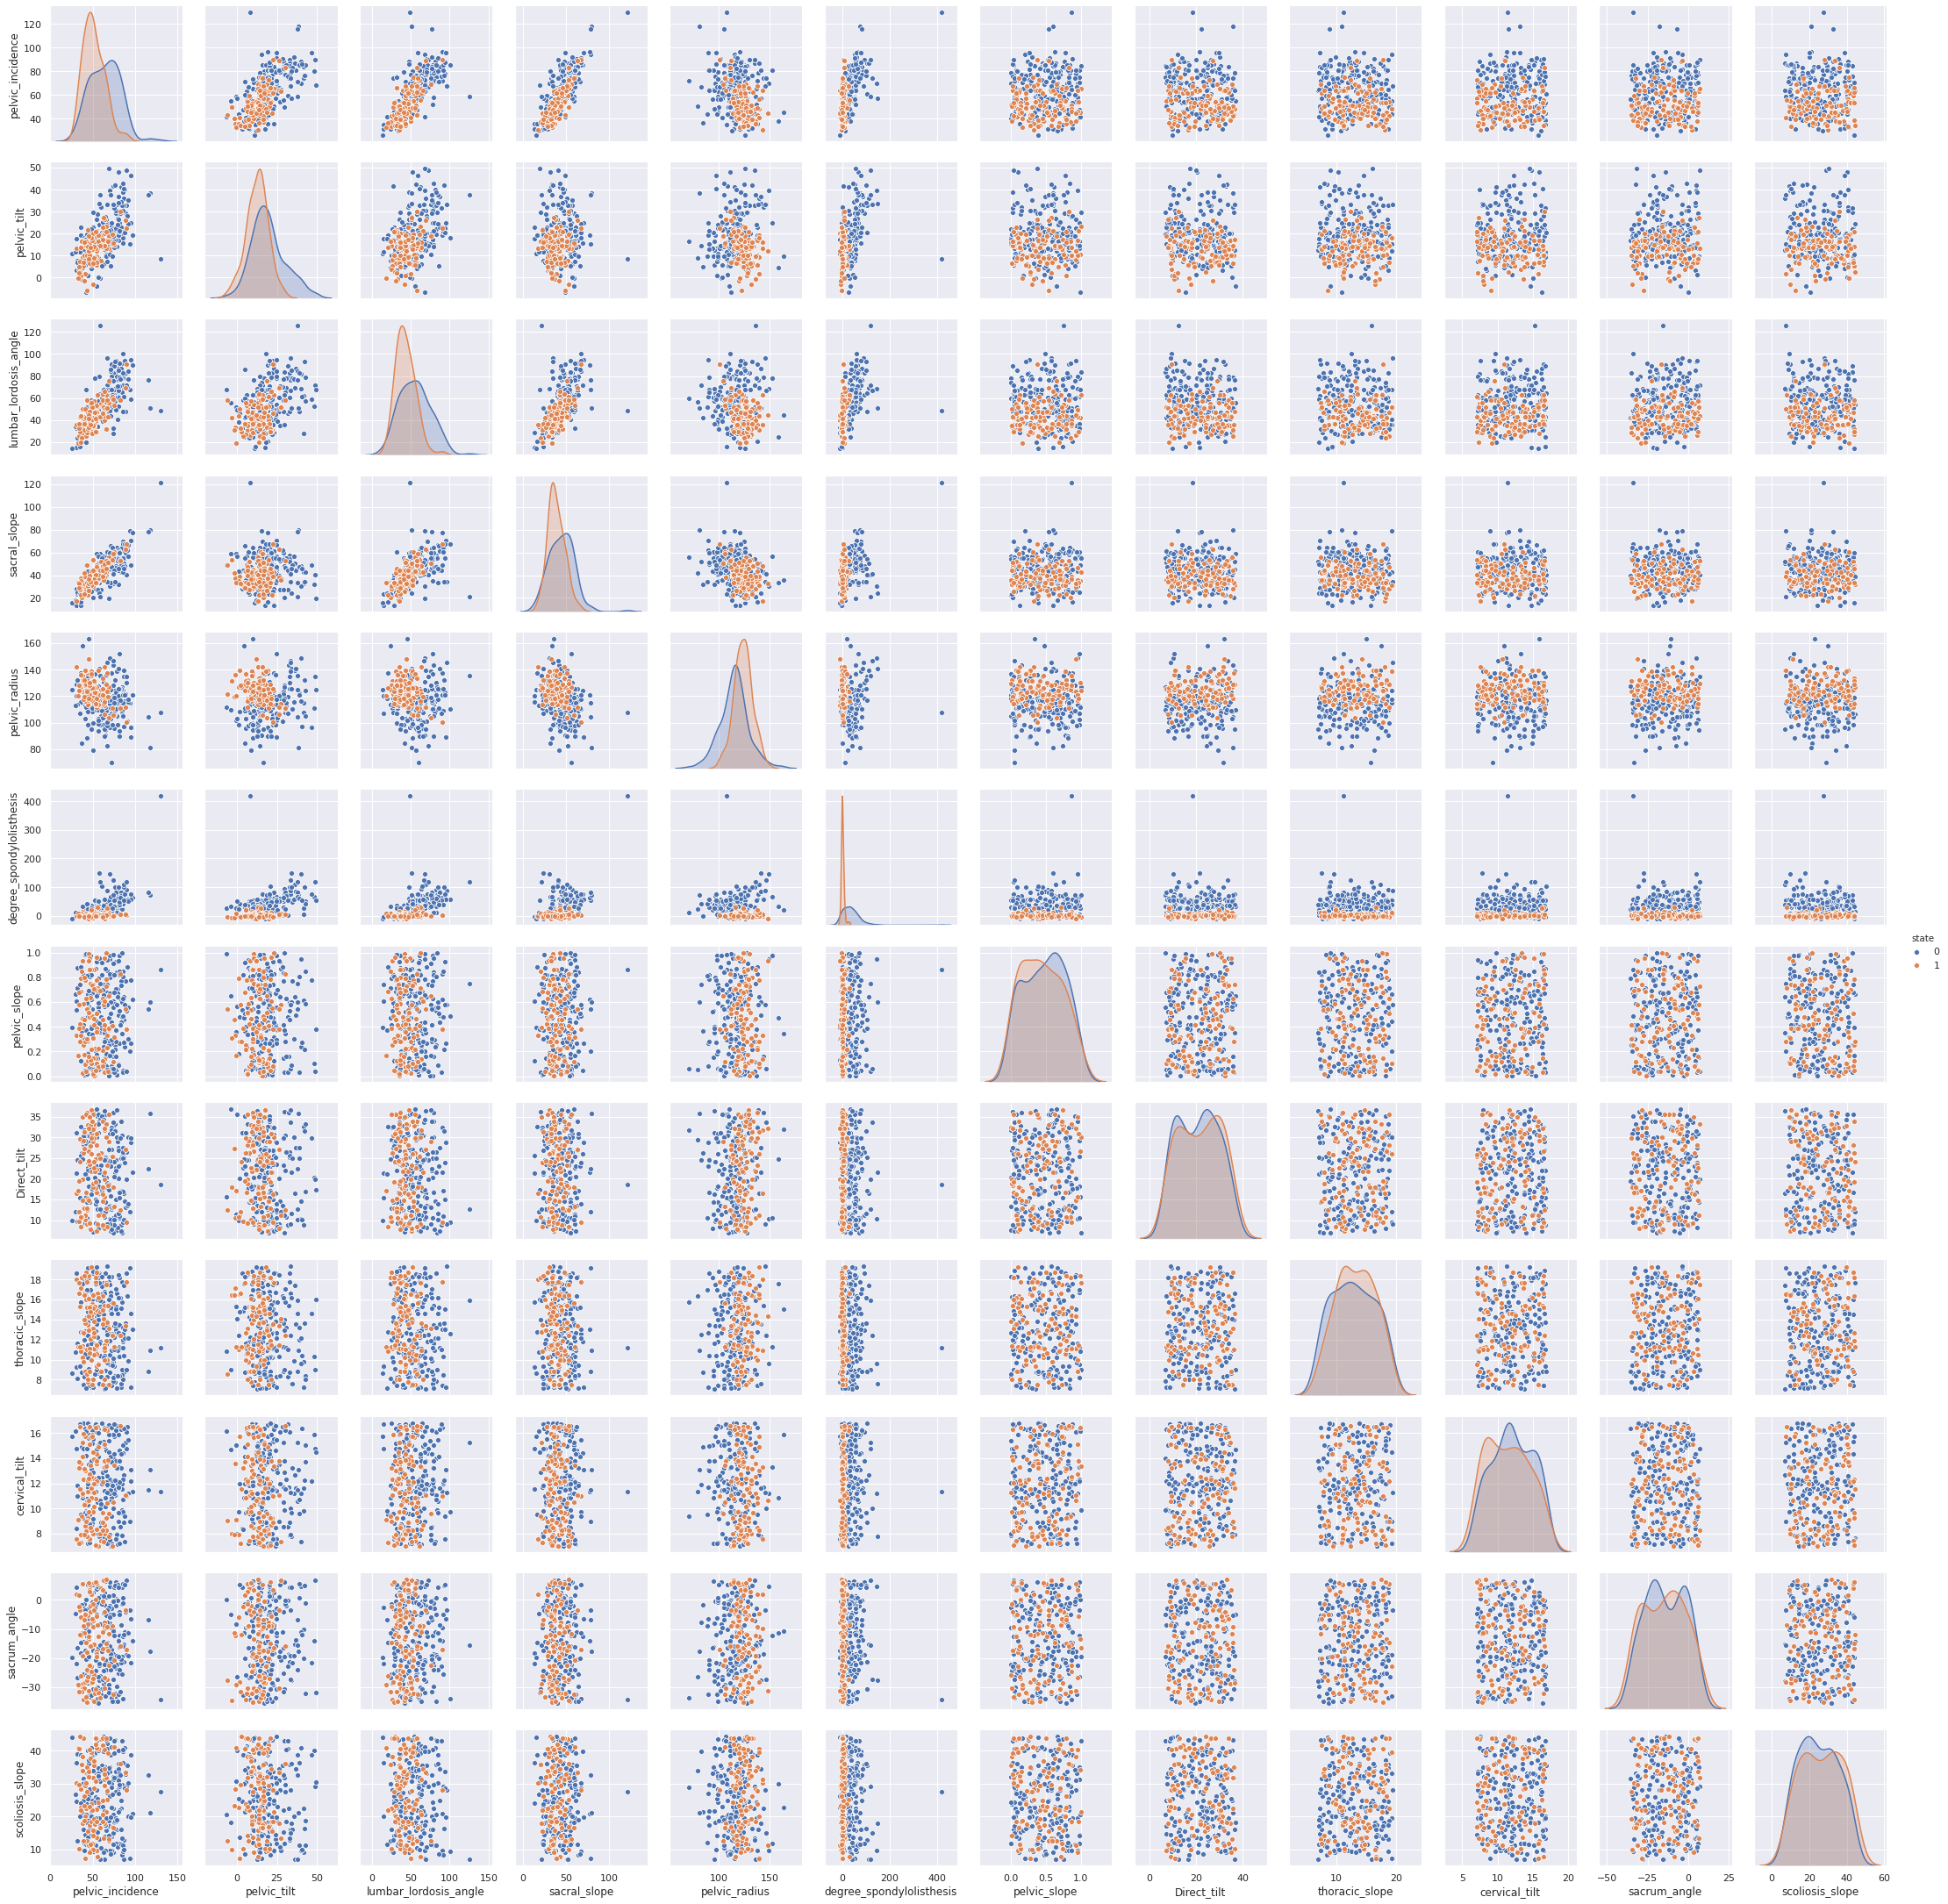

In [19]:
sns.set()
sns.pairplot(df,hue="state")
plt.show()

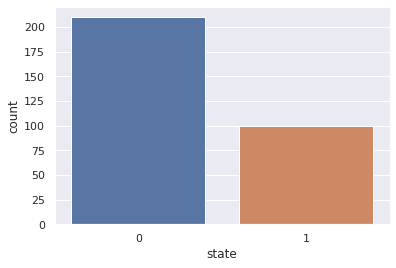

In [20]:
sns.set()
sns.countplot(x = "state",data=df)
plt.show()

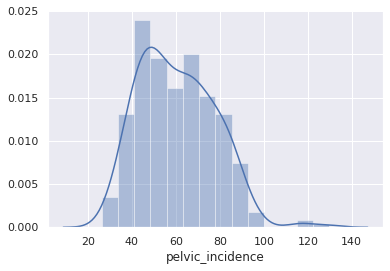

In [21]:
sns.set()
sns.distplot(df["pelvic_incidence"])
plt.show()

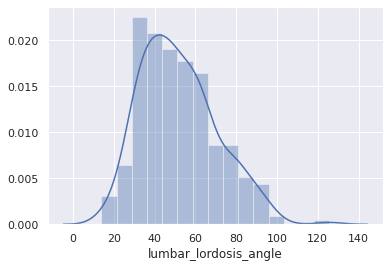

In [22]:
sns.set()
sns.distplot(df["lumbar_lordosis_angle"])
plt.show()

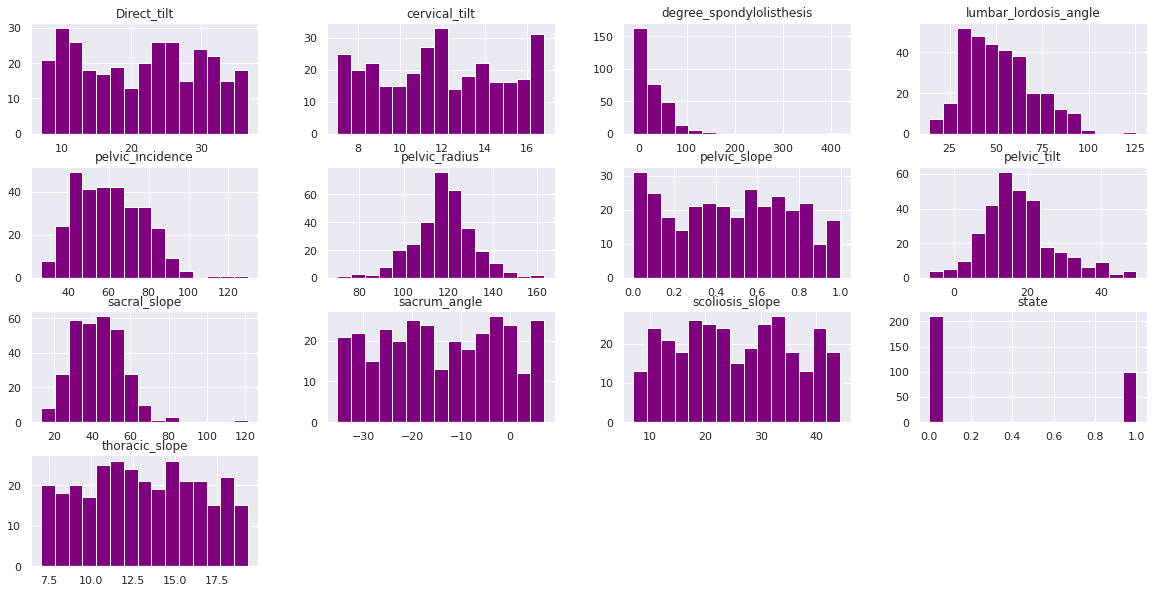

In [23]:
sns.set()
df.hist(figsize=(20,10),bins = 15,color="purple")
plt.title("Distribution of Features")
plt.show()

## Looks like Most of the Data are Not Normally Distributed

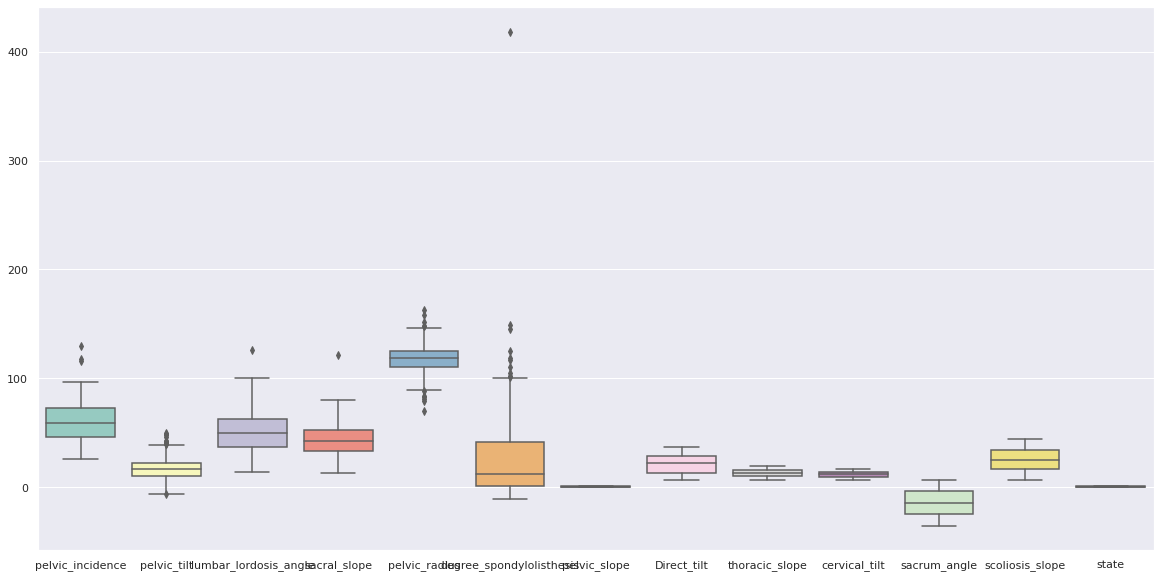

In [24]:
plt.figure(figsize=(20,10))
sns.set()
sns.boxplot(data=df,palette= "Set3")
plt.show()

In [25]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'state'],
      dtype='object')

## So there are some Outlier,Let's remove those outliers

In [26]:
lower_limit = df["pelvic_incidence"].mean() - 3*df["pelvic_incidence"].std()
upper_limit = df["pelvic_incidence"].mean() + 3*df["pelvic_incidence"].std()

In [28]:
df2 = df[(df["pelvic_incidence"] > lower_limit) & (df["pelvic_incidence"] < upper_limit)]

In [29]:
df.shape[0] - df2.shape[0]

3

In [31]:
lower_limit = df2["pelvic_tilt"].mean() - 3*df2["pelvic_tilt"].std()
upper_limit = df2["pelvic_tilt"].mean() + 3*df2["pelvic_tilt"].std()

In [33]:
df3 = df2[(df2["pelvic_tilt"] > lower_limit) & (df2["pelvic_tilt"] < upper_limit)]

In [34]:
df2.shape[0] - df3.shape[0]

3

In [36]:
lower_limit = df3["lumbar_lordosis_angle"].mean() - 3*df3["lumbar_lordosis_angle"].std()
upper_limit = df3["lumbar_lordosis_angle"].mean() + 3*df3["lumbar_lordosis_angle"].std()

In [89]:
df4 = df3[(df3["pelvic_tilt"] > lower_limit) & (df3["pelvic_tilt"] < upper_limit)]

In [90]:
df3.shape[0] - df4.shape[0]

0

In [91]:
lower_limit = df4["degree_spondylolisthesis"].mean() - 2*df4["degree_spondylolisthesis"].std()
upper_limit = df4["degree_spondylolisthesis"].mean() + 2*df4["degree_spondylolisthesis"].std()

In [92]:
df5 = df4[(df4["degree_spondylolisthesis"] > lower_limit) & (df4["degree_spondylolisthesis"] < upper_limit)]

In [93]:
df4.shape[0] - df5.shape[0]

13

In [94]:
df5.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,state
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


In [95]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          291 non-null    float64
 1   pelvic_tilt               291 non-null    float64
 2   lumbar_lordosis_angle     291 non-null    float64
 3   sacral_slope              291 non-null    float64
 4   pelvic_radius             291 non-null    float64
 5   degree_spondylolisthesis  291 non-null    float64
 6   pelvic_slope              291 non-null    float64
 7   Direct_tilt               291 non-null    float64
 8   thoracic_slope            291 non-null    float64
 9   cervical_tilt             291 non-null    float64
 10  sacrum_angle              291 non-null    float64
 11  scoliosis_slope           291 non-null    float64
 12  state                     291 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 31.8 KB


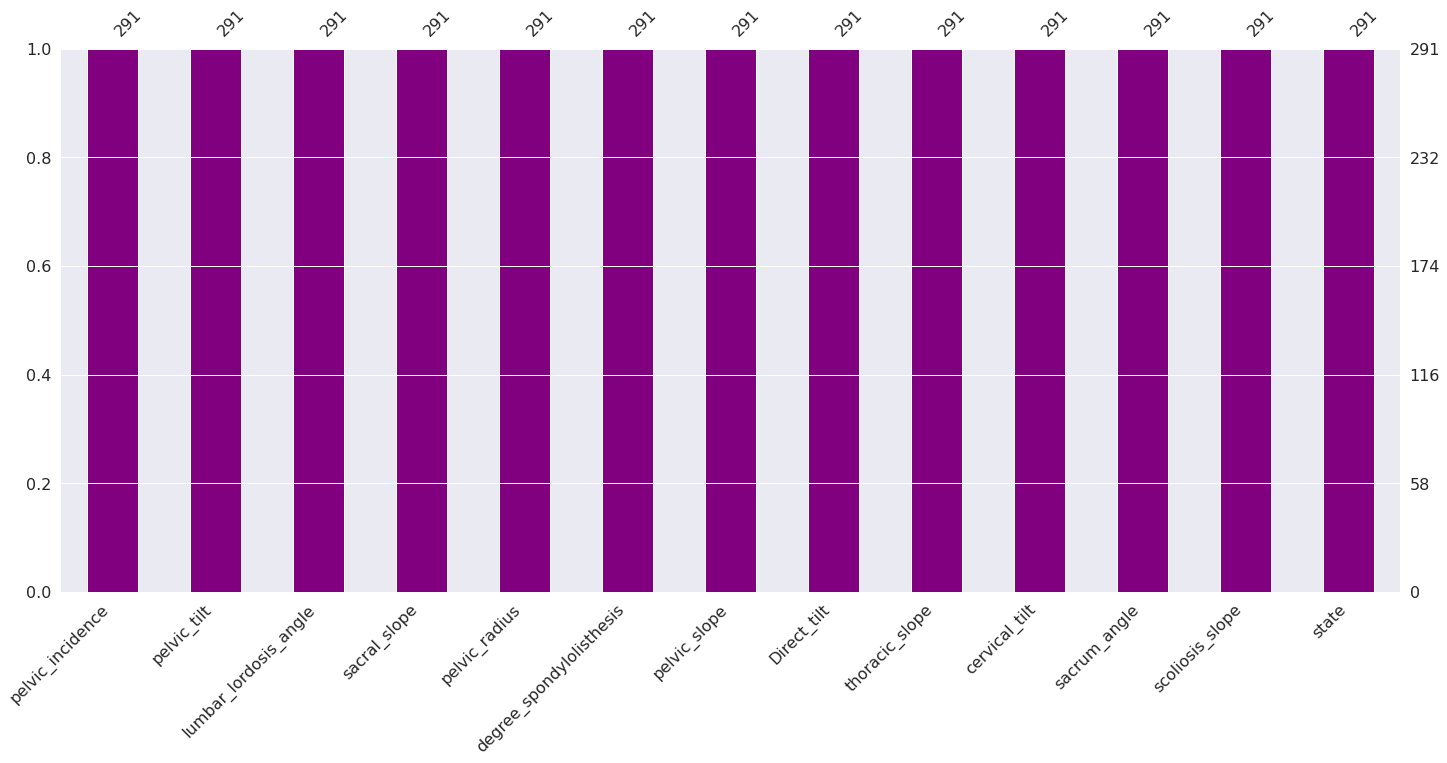

In [96]:
import missingno as msno
n = msno.bar(df5,color='purple')

## We can see that there is no Null Values

In [97]:
x = df5.drop("state",axis=1)
y = df5["state"]

## Now let's scale our Dataset

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [99]:
x

array([[ 0.24796894,  0.69689998, -0.62215366, ...,  1.17310947,
        -1.20137835,  1.70487916],
       [-1.24744958, -0.71258909, -1.44715652, ...,  1.68198784,
        -0.94310167, -0.92930268],
       [ 0.6100632 ,  0.65920136, -0.02953183, ...,  1.6387075 ,
        -1.23220969, -0.63015369],
       ...,
       [ 0.14932473,  0.71296569, -0.25123886, ..., -1.03025843,
         1.4593385 , -0.70773113],
       [-0.86092306, -0.86692865, -0.51056036, ..., -0.73339152,
         1.64123198,  0.76346203],
       [-1.57280584, -1.27529724, -0.78993197, ...,  0.63149839,
         1.31223999,  1.42538889]])

## Let's find the best model for our Dataset

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [101]:
model_params ={
    "svm": {
        "model" : SVC(gamma="auto"),
        "params": {
            "C" : [1,10,20],
            "kernel": ["rbf"],
            "random_state":[0,10,100]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            "criterion": ["entropy","gini"],
            "max_depth": [5,8,9],
            "random_state":[0,10,100]
        }
    },
    "random_forest":{
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators" : [1,5,10],
            "max_depth" : [5,8,9],
            "random_state":[0,10,100]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params": {}
    },
    
    "logistic_regression":{
        "model" : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        "params":{
            "C" : [1,5,10],
            "random_state":[0,10,100]
        }
    },
    "knn" : {
        "model" : KNeighborsClassifier(),
        "params": {
            "n_neighbors" : [5,12,13]
        }
    }
    
    
}

In [102]:
scores =[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=12,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

In [103]:
result_score = pd.DataFrame(scores, columns = ["Model","Best_Score","Best_Params"])

In [104]:
result_score

,Model,Best_Score,Best_Params
0,svm,0.799306,"{'C': 1, 'kernel': 'rbf', 'random_state': 0}"
1,decision_tree,0.788472,"{'criterion': 'entropy', 'max_depth': 5, 'rand..."
2,random_forest,0.826528,"{'max_depth': 5, 'n_estimators': 10, 'random_s..."
3,naive_bayes,0.773889,{}
4,logistic_regression,0.826250,"{'C': 10, 'random_state': 0}"
5,knn,0.761389,{'n_neighbors': 13}


In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 10)

In [106]:
clf_rf = RandomForestClassifier(max_depth = 8,n_estimators =10,random_state=0)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=10, random_state=0)

In [107]:
y_pred = clf_rf.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8356164383561644

In [109]:
clf_lr = LogisticRegression(C=12,random_state = 100)
clf_lr.fit(x_train,y_train)

LogisticRegression(C=12, random_state=100)

In [110]:
y_pred = clf_lr.predict(x_test)

In [111]:
accuracy_score(y_test,y_pred)

0.8493150684931506

## So we can see that, by using Logistic Regression we are getting 84% accuracy

## Now let's see our Actual vs Predicted Value

In [113]:
result = pd.DataFrame({"Actual_Value": y_test, "Predicted_Value": y_pred})

In [114]:
result

,Actual_Value,Predicted_Value
242,1,1
207,0,0
196,0,0
260,1,1
59,0,0
...,...,...
164,0,0
287,1,0
82,0,0
60,0,0
